In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('StudentsPerformance.csv')

In [115]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [116]:
#checking null values in a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [124]:
#converting the feature names into non-spaces
column_names = df.columns
for column in column_names:
    new_name = column.replace(' ','_')
    df.rename(columns={column:new_name},inplace=True)
    


In [125]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1)1. Find out how many males and females participated in the test.


In [52]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?


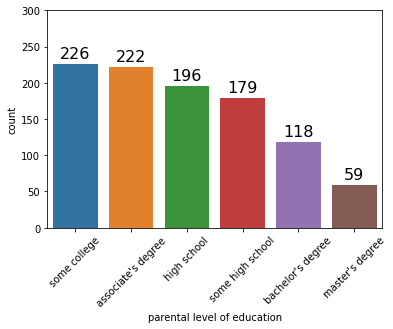

In [107]:
a = df['parental level of education'].value_counts()
fig = sns.countplot(x=df['parental level of education'],data=df, order = a.index)
plt.xticks(rotation = 45,fontsize = 10)
plt.ylim(0,300)
for i,j in enumerate(a):
    plt.text(i,j+8,f'{j}',ha='center',fontsize=16)
plt.show()
#From the graph the parental level of education is more in some college and very few of them have masters degree

# 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [126]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [147]:
d_gender = df.groupby('gender')[['math_score','reading_score','writing_score']].mean()
d_gender.sort_values(by='gender',ascending=False).head(1)
#Male scores the most in average of  all three 

,math_score,reading_score,writing_score
gender,,,
male,68.821577,65.545643,63.446058


In [148]:
#grouping by test preparation course
d_test_preparation_course = df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()
d_test_preparation_course.sort_values(by='test_preparation_course',ascending=False).head(1)
#

,math_score,reading_score,writing_score
test_preparation_course,,,
none,63.78972,66.417445,64.457944


# 4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

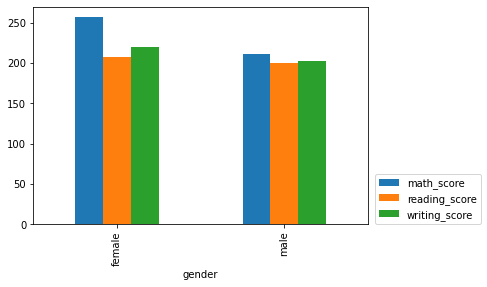

In [221]:
v= df.groupby('gender')[['math_score','reading_score','writing_score']].var()
v.plot(kind='bar').legend(loc=(1.02,0))
plt.show()

In [174]:
v.nsmallest(1,df[['math_score','reading_score','writing_score']])
#it shows male has least variation hence more consistent in the scores 

,math_score,reading_score,writing_score
gender,,,
male,211.889097,200.21101,202.413924


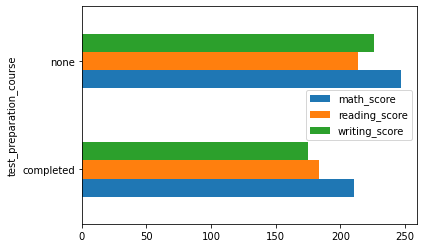

In [202]:
#now variation based on test preparation course 
test_pc = df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].var()
test_pc.plot(kind='barh',lw=4)
plt.show()

In [185]:
test_pc.nsmallest(1,df[['math_score','reading_score','writing_score']])
# it shows completed onces are more consistent due to less variation 

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,210.884027,183.265864,175.202612


# 5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.


In [187]:
df.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28


In [207]:
d = df['math_score'].sort_values(ascending=False)

In [208]:
d.quantile(.25)


57.0

In [222]:
# students with 57 marks in math will be given bonus
